In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [51]:
mnist = tf.keras.datasets.mnist

In [52]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [53]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [54]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [55]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape = (28, 28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [58]:
class MyCallback (tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training =True

callbacks = MyCallback()

In [59]:
history = model.fit(x_train, y_train, epochs= 10, callbacks=[callbacks])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8632 - loss: 0.4765
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9652 - loss: 0.1147
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9770 - loss: 0.0725
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9832 - loss: 0.0519
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9882 - loss: 0.0367
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9898 - loss: 0.0301
Epoch 7/10
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0219
Reached 99% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9931 - loss: 0.0219


In [60]:
# stats 
print("Epoches: ",history.epoch, "Last Accuracy: ",history.history['accuracy'][-1])

Epoches:  [0, 1, 2, 3, 4, 5, 6] Last Accuracy:  0.9918000102043152


In [61]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9702 - loss: 0.1038
Test accuracy: 97.40%


In [62]:
model.save('mnist.keras')

In [63]:
saved_model = tf.keras.models.load_model('mnist.keras')

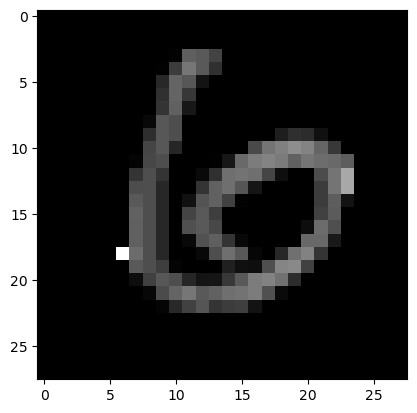

Actual label: 6


In [70]:
plt.imshow(x_test[11],  cmap='gray')
plt.show()
print("Actual label:", y_test[11])

In [65]:
res = saved_model.predict(x_test[11].reshape(1, 28, 28))
index = np.argmax(res)
print(index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
6


In [66]:
print(os.getcwd())

C:\Users\essid\Jupyter Projects\MNIST


In [71]:
images = {}

for i in range(len(x_test)):
    if y_test[i] not in images:
        images[y_test[i]] = x_test[i]
    if len(images) == 10:
        break


{7: array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


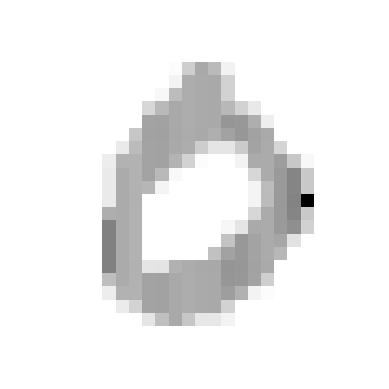

The number is probably a 0
The actual number is a 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


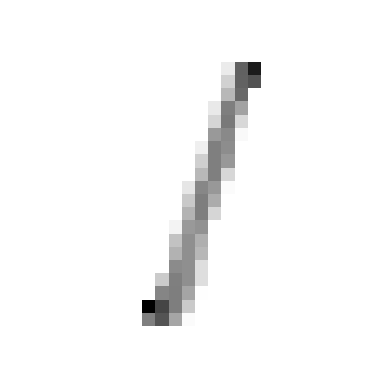

The number is probably a 1
The actual number is a 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


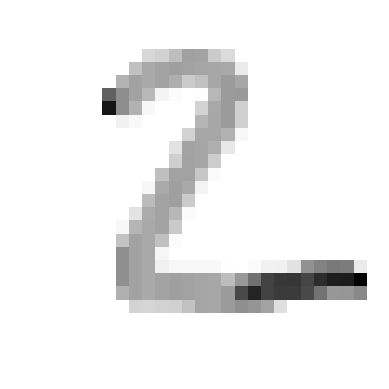

The number is probably a 2
The actual number is a 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


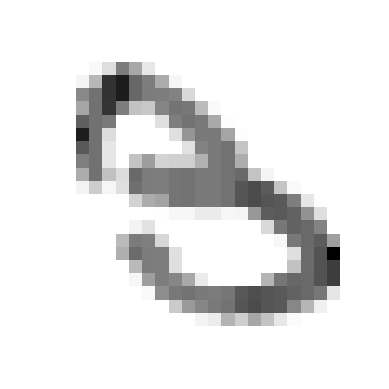

The number is probably a 3
The actual number is a 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


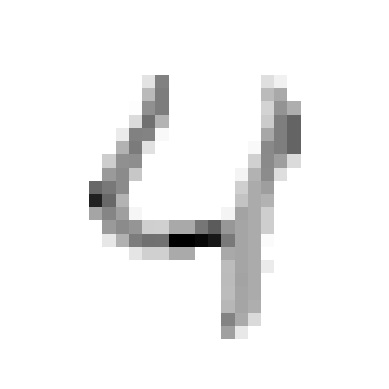

The number is probably a 4
The actual number is a 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


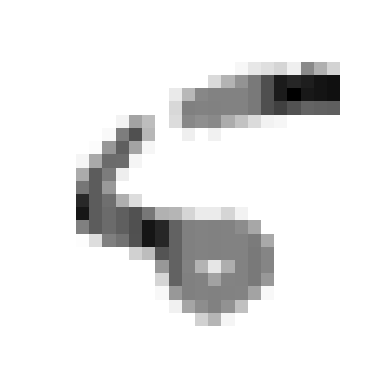

The number is probably a 5
The actual number is a 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


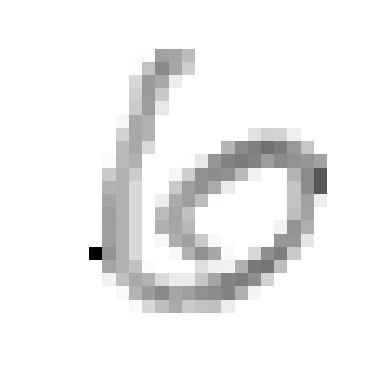

The number is probably a 6
The actual number is a 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


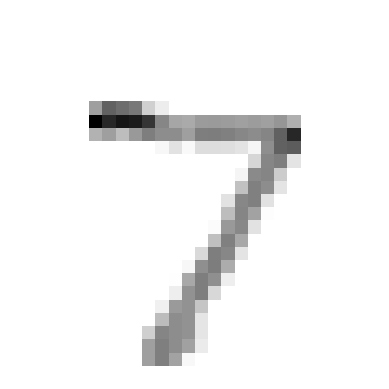

The number is probably a 7
The actual number is a 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


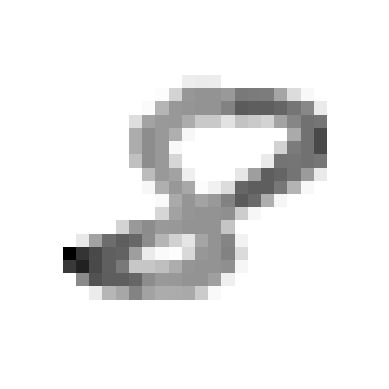

The number is probably a 8
The actual number is a 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


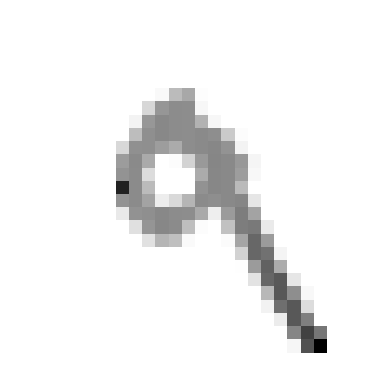

The number is probably a 9
The actual number is a 9


In [68]:
for i in range(10):
    img = images[i]
    pred = saved_model.predict(img.reshape(1,28,28))
        
    # Show image using matplotlib
    plt.imshow(img, cmap=plt.cm.binary)
    plt.axis('off')
    plt.show()

    print(f"The number is probably a {np.argmax(pred)}")
    
    print(f"The actual number is a {i}")